<a href="https://colab.research.google.com/github/GoldKodo/Data/blob/main/11%EC%A3%BC%EC%B0%A8_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 한글 세팅


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행후 세션리스타트

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,059 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and dire

Q 위키백과 제공코드 가져오기

In [1]:
#제공코드 가져와서 변형
#-*- coding:utf-8 -*-
import urllib3
import json

openApiURL = "http://aiopen.etri.re.kr:8000/WikiQA"
accessKey = "227e6bc0-f5a0-4024-bf96-262dceba554c"
question = "김구가 누구야"
etype = "ENGINE_TYPE"      # type 은 파이썬 용어라 etype으로 변경. 홈페이지 자체의 문제임

requestJson = {
  "argument": {
    "question": question,
    "type": etype
  }
}

http = urllib3.PoolManager()
response = http.request(
"POST",
openApiURL,
headers={"Content-Type": "application/json; charset=UTF-8","Authorization": accessKey},
body=json.dumps(requestJson)
)

print("[responseCode] " + str(response.status))
print("[responBody]")
print(str(response.data,"utf-8"))

[responseCode] 200
[responBody]
{"result":0,"return_object":{"WiKiInfo":{"IRInfo":[{"wiki_title":"","sent":"","url":""}],"AnswerInfo":[{"rank":1,"answer":"김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다.","confidence":0,"url":["https://ko.wikipedia.org/wiki/김구"]}]}}}


In [2]:
response_data = response.json()
#response_data = json.loads(response.data.decode("utf-8"))
print(response_data)

{'result': 0, 'return_object': {'WiKiInfo': {'IRInfo': [{'wiki_title': '', 'sent': '', 'url': ''}], 'AnswerInfo': [{'rank': 1, 'answer': "김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다.", 'confidence': 0, 'url': ['https://ko.wikipedia.org/wiki/김구']}]}}}


In [3]:
print(type(response_data))

<class 'dict'>


In [4]:
response_data.keys()

dict_keys(['result', 'return_object'])

In [5]:
response_data['return_object'].keys()

dict_keys(['WiKiInfo'])

In [6]:
answer_info = response_data['return_object']['WiKiInfo']['AnswerInfo'][0] #리턴옵젝 안에 위키인포 안에 앤서인포의 첫번째
answer_info

{'rank': 1,
 'answer': "김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다.",
 'confidence': 0,
 'url': ['https://ko.wikipedia.org/wiki/김구']}

In [7]:
answer_info['answer']

"김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다."

Q 데이터 분석 전문가에 대한 정보 추출

rank, confidence, url 출력해보기

In [8]:
answer_info = response_data['return_object']['WiKiInfo']['AnswerInfo'][0]
print("Answer:", answer_info['answer'])
print("Rank:", answer_info['rank'])
print("Confidence:", answer_info['confidence'])
print("URL:", answer_info['url'])

Answer: 김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다.
Rank: 1
Confidence: 0
URL: ['https://ko.wikipedia.org/wiki/김구']


함수 get_wiki(text, apikey) answer을 반환하는 함수를 만드시오

In [9]:
def get_wiki(text, apikey):
  requestJson = {
  "argument": {
    "question": text,
    "type": etype
    }
  }

  http = urllib3.PoolManager()
  response = http.request(
      "POST",
      openApiURL,
      headers={"Content-Type": "application/json; charset=UTF-8","Authorization": accessKey},
      body=json.dumps(requestJson))

  response_data = response.json()
  answer_info = response_data['return_object']['WiKiInfo']['AnswerInfo'][0]
  return answer_info['answer']

In [10]:
text = get_wiki("데이터 분석이 뭐야", accessKey)

워드클라우드와 konlpy 설치

In [11]:
!pip install wordcloud konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.9 MB/s eta 0:00:00


Q 위키데이터로 분석하기


In [13]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt


okt = Okt()
tokens = okt.nouns(text)
print(tokens)

['데이터', '분석', '전문가', '란', '데이터', '이해', '및', '처리', '기술', '대한', '지식', '바탕', '데이터', '분석', '기획', '데이터', '분석', '데이터', '시각', '업무', '수행', '통해', '프로세스', '혁신', '및', '마케팅', '전략', '결정', '등', '과학', '의사결정', '지원', '직무', '수행', '전문가', '말']


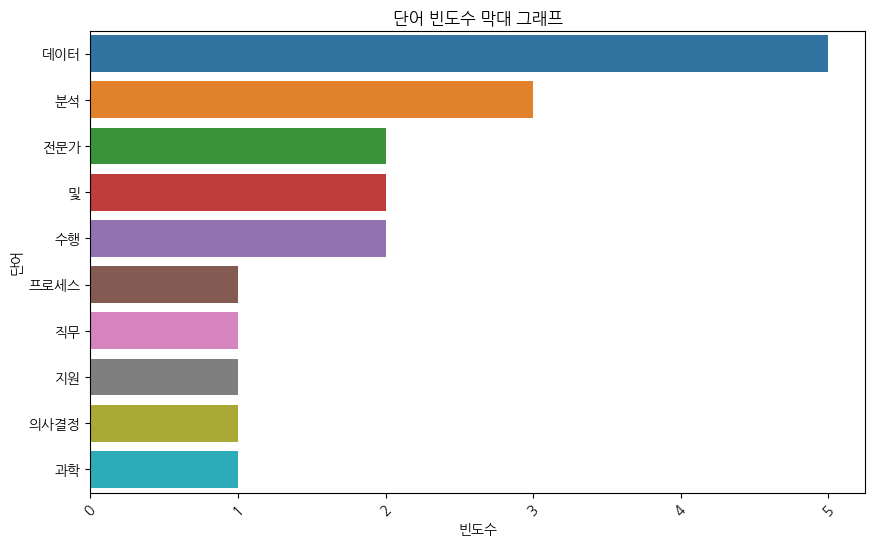

In [26]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

okt = Okt()
tokens = okt.nouns(text)
word_counts = Counter(tokens)
words = list(word_counts.keys())
counts = list(word_counts.values())

dt = pd.DataFrame({
    '단어': words,
    '빈도수': counts
})

dt10 = dt.sort_values(by = '빈도수', ascending = False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y='단어', x='빈도수', hue="단어", data=dt10)
plt.title('단어 빈도수 막대 그래프')
plt.xticks(rotation=45)
plt.show()

Q 텍스트를 받아 막대그래프 그리는 함수

In [15]:
text = answer_info['answer']
text

"김구(金九, 1876년 8월 29일 (1876년 음력 7월 11일) - 1949년 6월 26일)는 일제강점기 독립운동가이자 대한민국의 통일운동가, 정치인이다. 의열단체 한인애국단을 이끌었고 대한민국 임시 정부 주석을 역임하였으며 1962년 '건국훈장 대한민국장'이 추서되었다."

In [16]:
text = get_wiki("데이터 분석이 뭐야", accessKey)
text

'데이터 분석 전문가(ADP)란 데이터 이해 및 처리 기술에 대한 기본지식을 바탕으로 데이터 분석 기획, 데이터 분석, 데이터 시각화 업무를 수행하고, 이를 통해 프로세스 혁신 및 마케팅 전략 결정 등의 과학적 의사결정을 지원하는 직무를 수행하는 전문가를 말한다.'

In [31]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt

#함수
def wiki(text):
  requestJson = {
  "argument": {
    "question": text,
    "type": etype
    }
  }

  http = urllib3.PoolManager()
  response = http.request(
      "POST",
      openApiURL,
      headers={"Content-Type": "application/json; charset=UTF-8","Authorization": accessKey},
      body=json.dumps(requestJson))
  response_data = response.json()
  answer_info = response_data['return_object']['WiKiInfo']['AnswerInfo'][0]
  text = answer_info['answer'] #이게 위키를 접속해서 긁어오는 코딩인데, 위에선 이미 세션에 들어가 있기 때문에 이거 없이도 작동한거고,
                               #함수에서 사용할 경우에는 다시 만들어줘야함.

  okt = Okt()
  tokens = okt.nouns(text)
  word_counts = Counter(tokens)
  words = list(word_counts.keys())
  counts = list(word_counts.values())

  dt = pd.DataFrame({
      '단어': words,
      '빈도수': counts
  })
  dt


  dt10 = dt.sort_values(by = '빈도수', ascending = False).head(10)

  plt.figure(figsize=(10, 6))
  sns.barplot(y='단어', x='빈도수', hue="단어", data=dt10)
  plt.title('단어 빈도수 막대 그래프')
  plt.xticks(rotation=45)
  plt.show()
  return answer_info['answer']

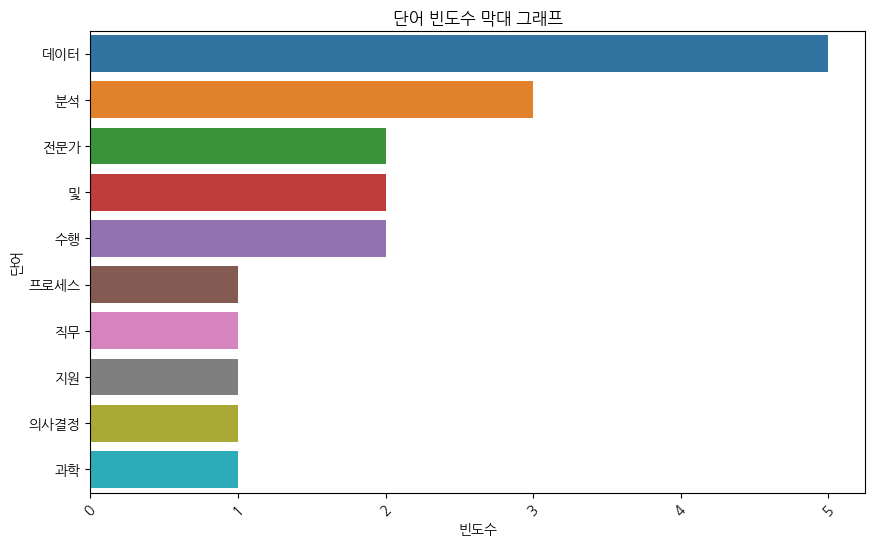

'데이터 분석 전문가(ADP)란 데이터 이해 및 처리 기술에 대한 기본지식을 바탕으로 데이터 분석 기획, 데이터 분석, 데이터 시각화 업무를 수행하고, 이를 통해 프로세스 혁신 및 마케팅 전략 결정 등의 과학적 의사결정을 지원하는 직무를 수행하는 전문가를 말한다.'

In [32]:
wiki("데이터 분석이 뭐야")